
# Performace Assessment: D207 Exploratory Data Analysis

Shabnam Ahmadi
<br>Department of Information Technology, Western Governors University
<br>D207: Exploratory Data Analysis
<br>Professor David Gagner
<br>July 6, 2022

## Task A:  Describe a real-world organizational situation or issue in the Data Dictionary you chose, by doing the following:

### **1.  Provide one question that is relevant to your chosen data set.**

Preventable rehospitalization is a persistent financial challenge for medical institutions across the United States. This occurrence is frequent enough to where there is an external organization, Centers for Medicare and Medicaid Services (CMS), that penalizes hospitals for excessive readmissions. The Kaiser Family Foundations states that some of these readmission are preventable if more measures were in conduct by both the healthcare professionals and patients during and after they leave the hospital (Rau, 2021).

The percentage of hospitals penalized for readmission has increased each year since the CMS began imposing penalties. According to the CMS reports, there were approximately 78% of hospitals that were fined with readmission penalties in the year 2015. About 75% of hospitals report being confident in their ability to remedy and reduce these fines and only 55% of hospitals project receiving these penalties. However, given the historical trend, the percentage of total hospitals fined is projected to be higher than 55%. Although hospitals are becoming more proactive and asserting more reduction strategies, fewer than 20% utilize technologies that is specific to reducing readmission.

Given the context above, we can begin questioning if there are predictive measures that can be taken place when given patient information. For this project, my research question will be:

**Who are the patients who are at the highest risk of readmission?**

### **2.  Explain how stakeholders in the organization could benefit from an analysis of the data.**

Stakeholders will benefit from this analysis by understanding which patients are at the highest risk of readmission. Additionally, stakeholders will be informed on what charaterists are relevant in predicting patient readmission. This information will be beneficial to the stakeholders because it will provide insight in making decisions in the interests of the business. For example, if the stakeholders are planning to strat a project on reducing readmission in patients, information for this analysis could help identify focus areas.

### **3.  Identify all of the data in your data set that are relevant to answering your question in part A1.**

In our data cleaning phase, we conducted a Principal Component Analysis (PCA) and identified 4 principal components that explain approximately 39% of the variance in the data. The variables are as follows: 
> * TimelyAdmission
> * TimelyTreatment
> * TimelyVisits
> * TreatmentTime

The variables are ordered respective to the most significant variable to the least. In this analysis, we will assess the TimelyAdmission variable with the ReAdmis variable. The principal components above are survey responses, the values are integers between 1 through 8, 1 represents the least satisfaction and 8 representing the most satisfaction. ReAdmis is a binary yes or no variable that indicates whether the patient has been readmitted into the hospital. Since both variables are categorical, we will be conducting a **chi-squared test**.

## Task B:  Describe the data analysis by doing the following:

### 1.  Using one of the following techniques, write code (in either Python or R) to run the analysis of the data set:

> - chi-square 
> - t-test
> - ANOVA


In [1]:
# Standard data science imports
import numpy as np
import pandas as pd
from pandas import DataFrame

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistics packages
import pylab
import statsmodels.api as sm
import statistics
from scipy import stats

# Import chisquare from SciPy.stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv(r"C:\Users\shabn\Documents\WGU - MSDA\D207\Medical Data - 207\medical_clean.csv")

In [3]:
# rename the survey columns

df.rename(columns = {
    'Item1':'TimelyAdmission',
    'Item2':'TimelyTreatment',
    'Item3':'TimelyVisits',
    'Item4':'Reliability',
    'Item5':'Options',
    'Item6':'TreatmentTime',
    'Item7':'Courteous',
    'Item8':'ActiveListenting'
}, inplace=True)

df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'TimelyAdmission',
       'TimelyTreatment', 'TimelyVisits', 'Reliability', 'Options',
       'TreatmentTime', 'Courteous', 'ActiveListenting'],
      dtype='object')

In [4]:
# to complete the chi-squared test, we will need to have a crosstab table of the two variables
# crosstab on ReAdmis and TimelyAdmission, note that ReAmis has Yes/No values and TimelyAdmission is a integer from 1 to 8

contingency1 = pd.crosstab(df['ReAdmis'], df['TimelyAdmission'])

contingency1

TimelyAdmission,1,2,3,4,5,6,7,8
ReAdmis,,,,,,,,
No,134,823,2137,2184,891,155,7,0
Yes,79,492,1267,1271,486,70,3,1


In [5]:
# next, we create a normalized table with the two variables

contingency_norm1 = pd.crosstab(df['ReAdmis'], df['TimelyAdmission'], normalize='index')

contingency_norm1

TimelyAdmission,1,2,3,4,5,6,7,8
ReAdmis,,,,,,,,
No,0.021166,0.129995,0.337545,0.344969,0.140736,0.024483,0.001106,0.000000
Yes,0.021532,0.134096,0.345326,0.346416,0.132461,0.019079,0.000818,0.000273


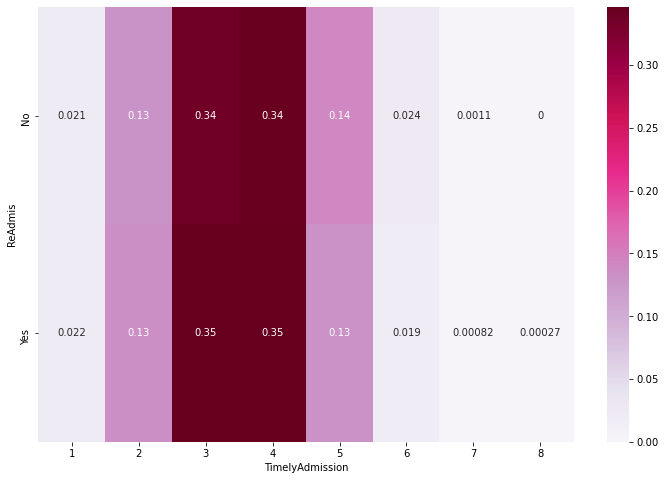

In [6]:
# heatmap to see the distribution of the variables, normalized helps the visualization

plt.figure(figsize=(12,8))
sns.heatmap(contingency_norm1, annot=True, cmap='PuRd')

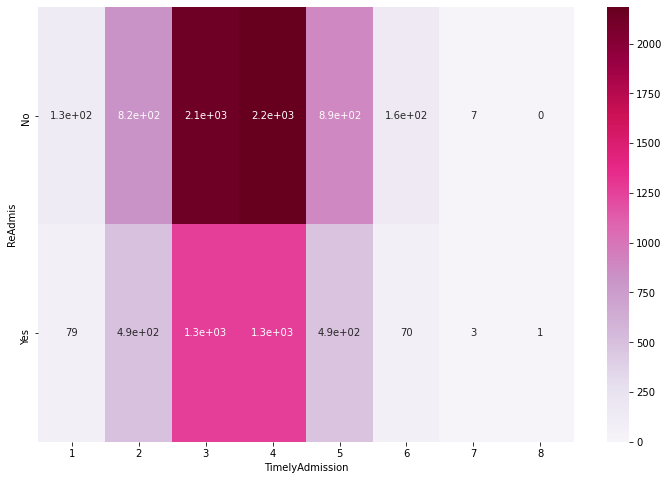

In [7]:
# heatmap of the original crosstab

plt.figure(figsize=(12,8))
sns.heatmap(contingency1, annot=True, cmap='PuRd')

### 2.  Provide the output and the results of any calculations from the analysis you performed.

In [8]:
c, p, dof, expected = chi2_contingency(contingency1)
print('p-value = ' + str(p))
print('chi-squared value = ' + str(c))
print('degrees of freedom = ' + str(dof))

p-value = 0.44711691481022053
chi-squared value = 6.8269565562495975
degrees of freedom = 7


The **null hypothesis, H<sub>0,** is: there is no relationship between the two variables (TimelyAdmission and ReAdmis) <br>
The **research hypothesis, H<sub>1,** is: there is a relationship between the two variables (TimelyAdmission and ReAdmis)

We will set our alpha, or significance value, at **0.05**, as this is the standrad practice.

Our calcualtions have found that the p-value of the two variables is approximately 0.45, which is higher than the alpha value of 0.05. Therefore, we accept the null hypothesis.

#### Chi-squared test on other Principal Components
Out of curiousity, we will conduce the chi-squared test on the other principal components.

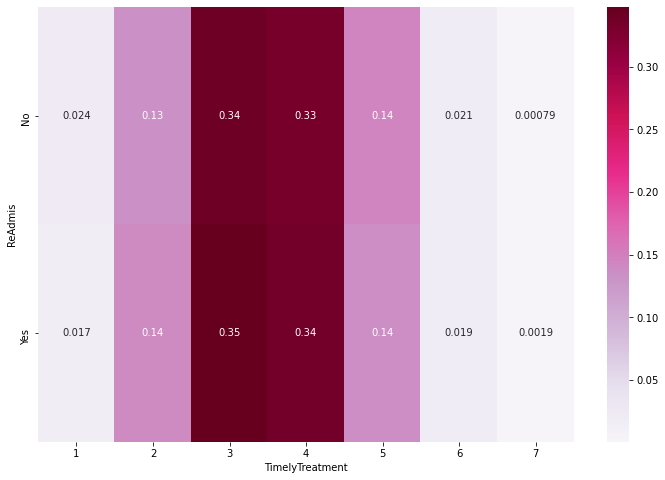

In [9]:
# just out of curiousity, we will run the chi-squared test on the other principal components 
# TimelyTreatment

contingency2 = pd.crosstab(df['ReAdmis'], df['TimelyTreatment'])
contingency_norm2 = pd.crosstab(df['ReAdmis'], df['TimelyTreatment'], normalize='index')
#
plt.figure(figsize=(12,8))
sns.heatmap(contingency_norm2, annot=True, cmap='PuRd')

In [10]:
c, p, dof, expected = chi2_contingency(contingency2)
print('Timely Treatment and Readmission:')
print('p-value = ' + str(p))
print('chi-squared value = ' + str(c))
print('degrees of freedom = ' + str(dof))

Timely Treatment and Readmission:
p-value = 0.16644430134991942
chi-squared value = 9.12914424629802
degrees of freedom = 6


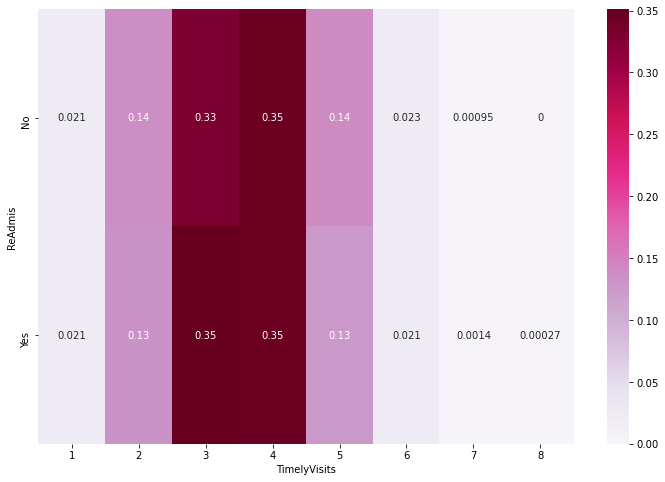

In [11]:
contingency3 = pd.crosstab(df['ReAdmis'], df['TimelyVisits'])
contingency_norm3 = pd.crosstab(df['ReAdmis'], df['TimelyVisits'], normalize='index')
#ok
plt.figure(figsize=(12,8))
sns.heatmap(contingency_norm3, annot=True, cmap='PuRd')

In [12]:
c, p, dof, expected = chi2_contingency(contingency3)
print('Timely Visits and Readmission:')
print('p-value = ' + str(p))
print('chi-squared value = ' + str(c))
print('degrees of freedom = ' + str(dof))

Timely Visits and Readmission:
p-value = 0.19565434092824896
chi-squared value = 9.876952935711348
degrees of freedom = 7


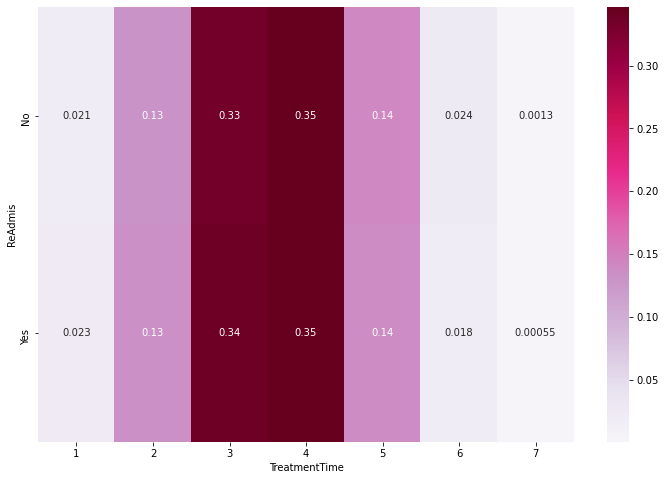

In [13]:
contingency4 = pd.crosstab(df['ReAdmis'], df['TreatmentTime'])
contingency_norm4 = pd.crosstab(df['ReAdmis'], df['TreatmentTime'], normalize='index')

plt.figure(figsize=(12,8))
sns.heatmap(contingency_norm4, annot=True, cmap='PuRd')

In [14]:
c, p, dof, expected = chi2_contingency(contingency4)
print('Treatment Time and Readmission:')
print('p-value = ' + str(p))
print('chi-squared value = ' + str(c))
print('degrees of freedom = ' + str(dof))

Treatment Time and Readmission:
p-value = 0.41313299412204035
chi-squared value = 6.090463952746655
degrees of freedom = 6


Interestingly, all principal components have a p-value higher than the defined alpha value of 0.05.

### 3.  Justify why you chose this analysis technique.

As mentioned above in Task A (3), we have used the chi-squared analysis since we are working with two categorical variables.

## Task C:  Identify the distribution of two continuous variables and two categorical variables using univariate statistics from your cleaned and prepared data. 

We will identify the distribution of the following variables:

Continuous data:
> * Initial_days
> * TotalCharge

Categorical data:
> * TimelyAdmission
> * TimelyTreatment


In [15]:
# initial days
df['Initial_days'].describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0DC8AE38>,
      dtype=object)

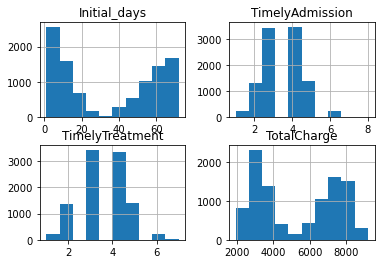

In [16]:
df[['Initial_days', 'TotalCharge', 'TimelyAdmission', 'TimelyTreatment']].hist()

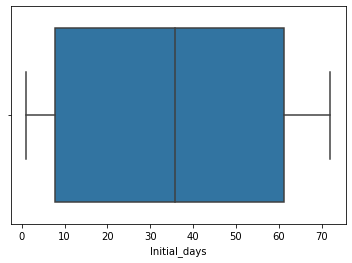

In [17]:
sns.boxplot('Initial_days', data = df)
plt.show()

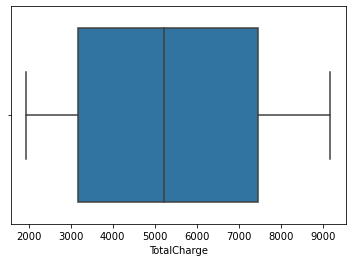

In [18]:
sns.boxplot('TotalCharge', data = df)
plt.show()

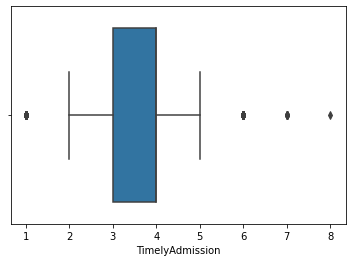

In [19]:
sns.boxplot('TimelyAdmission', data = df)
plt.show()

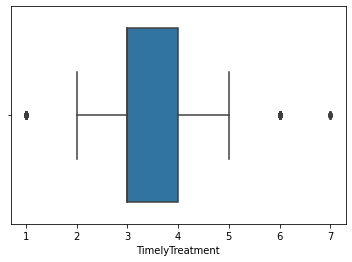

In [20]:
sns.boxplot('TimelyTreatment', data = df)
plt.show()

## Task D: Identify the distribution of two continuous variables and two categorical variables using bivariate statistics from your cleaned and prepared data.

Represent your findings in Part D, visually as part of your submission.

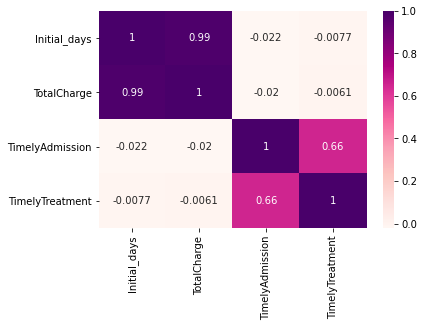

In [21]:
bivariate = df[['Initial_days', 'TotalCharge', 'TimelyAdmission', 'TimelyTreatment']]
sns.heatmap(bivariate.corr(), cmap='RdPu', annot=True)
plt.show()

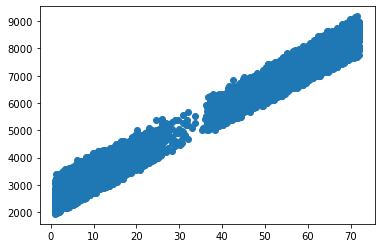

In [22]:
plt.scatter(df['Initial_days'], df['TotalCharge'])
plt.show()

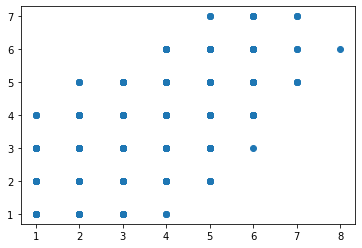

In [23]:
plt.scatter(df['TimelyAdmission'], df['TimelyTreatment'])
plt.show()

## Task E:  Summarize the implications of your data analysis by doing the following:

### 1.  Discuss the results of the hypothesis test.

Our reseach question explores whether there are any indicators on whether a patient will get readmitted into the hospital. In our prior analysis, we conducted a PCA on the variables of the data set. Our calculations found that TimelyAdmission was one of our principal components. In this analysis, we used the chi-squared test to determine whether there was a statistically significant relationship between the two variables TimelyAdmission and ReAdmis.

To set up our chi-squared test, we define the following:

The **null hypothesis, H<sub>0,** is: there is no relationship between the two variables (TimelyAdmission and ReAdmis) <br>
The **research hypothesis, H<sub>1,** is: there is a relationship between the two variables (TimelyAdmission and ReAdmis)


We will set our alpha, or significance value, at **0.05**, as this is the standard practice.



```
c, p, dof, expected = chi2_contingency(contingency1)
print('p-value = ' + str(p))
print('chi-squared value = ' + str(c))
print('degrees of freedom = ' + str(dof))
```

```
p-value = 0.44711691481022053
chi-squared value = 6.8269565562495975
degrees of freedom = 7
```

Using the code from above, we determined that the p-value of the two variables is approximately 0.45, which is higher than the alpha value of 0.05. Therefore, we accept the null hypothesis. It is unclear whether there is a relationship between the survey question regarding timely admission and readmission into the hospital.


### 2.  Discuss the limitations of your data analysis.

Our analysis revealed that there is no relationship between the readmission variable and the timely admission variable. Since our p-value was higher than the alpha value of 0.05, it is difficult to interpret whether there exsists a relationship or any significance between the two variables.

### 3.  Recommend a course of action based on your results.

I would recommend the hospital to collect better data on the patients and consider rewording their survey questions. Maybe conducting a detailed survey would help contribute to stronger data. I would also suggest focusing on the 4 principal components that were revealed in our data cleaning process as our analysis showed that the 4 principal components did explain a significant amount of varience in the data. 

## Task F : Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the tool(s) used. 

Please see the following link for the Panopto video: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=6a2c40b7-ac89-424d-a7af-aecc0108c741

## Task G and Task H:  Reference the web sources used to acquire segments of third-party code to support the analysis (Task G). Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized (Task H).

References: <br>

Frost, J. Chi-Square Test of Independence and an Example. Statistics by Jim. https://statisticsbyjim.com/hypothesis-testing/chi-square-test-independence-example/

Rau, J. (2021, November 4) 10 Years of Hospital Readmissions Penalties. KFF. 	https://www.kff.org/health-reform/slide/10-years-of-hospital-readmissions-penalties/#:~:text=The%20average%20penalty%20this%20fiscal,and%2055%25%20of%20all%20hospitals.

## Task I: Demonstrate professional communication in the content and presentation of your submission.

Please see the demonstration of professional communication throughout the presentation and the Panopto video. 